In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, label_binarize
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from bayes_opt import BayesianOptimization
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import confusion_matrix

from itertools import cycle

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
len(df)

7352

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
"angle(X,gravityMean)",7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
"angle(Y,gravityMean)",7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157
"angle(Z,gravityMean)",7352.0,-0.056515,0.279122,-1.000000,-0.143414,0.003181,0.107659,1.000000


In [8]:
# to clasify categorical data and numeric data
categorical_cols= df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['number']).columns

print(f'Categorical columns: {categorical_cols}')
print(f'Numeric columns: {numeric_cols}')

Categorical columns: Index(['Activity'], dtype='object')
Numeric columns: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)


In [9]:
# Use label Encoder 
le = LabelEncoder()
df['Activity_Encoded'] = le.fit_transform(df['Activity'])

# drop the original label column
df.drop('Activity', axis=1, inplace=True)

df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity_Encoded
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


In [10]:
# see the amout of the each label , and check out the numbers representation
activity_counts = df['Activity_Encoded'].value_counts()
activity_names = le.inverse_transform(activity_counts.index)

activity_summary = pd.DataFrame({'Activity': activity_names, 'Count': activity_counts.values})

display(activity_summary)

,Activity,Count
0,LAYING,1407
1,STANDING,1374
2,SITTING,1286
3,WALKING,1226
4,WALKING_UPSTAIRS,1073
5,WALKING_DOWNSTAIRS,986


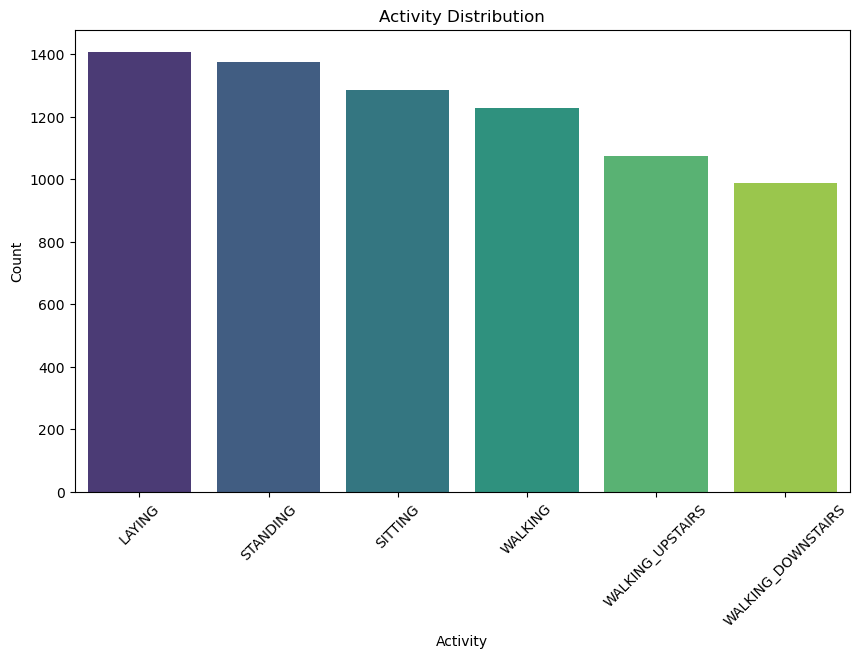

In [11]:
plt.figure(figsize=(10,6))

sns.barplot(data=activity_summary, x='Activity', y='Count', palette='viridis')
plt.title('Activity Distribution')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Detect and Handle outliers
# set two methods, median and quantile
def handle_outliers(df, method=None):
    
    df_copy = df.copy()
    
    if method is None:
        print('No method provided. Return Original Data.')
        return df_copy
    
    numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if method == 'median':
            
            # calculate median
            median = df_copy[col].median()
            
            # IQR
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # replace outliers to median
            df_copy[col] = df_copy[col].where(~((df_copy[col] < lower_bound)|(df_copy[col] > upper_bound)),
                                              other=median)
            
        elif method == 'quantile':
            
            lower_quantile = df_copy[col].quantile(0.01)
            upper_quantile = df_copy[col].quantile(0.99)
            
            df_copy[col] = df_copy[col].clip(lower_quantile, upper_quantile)
            
        else:
            print(f'Invalid method provided for {col}')
        
    return df_copy

In [13]:
# Create handle outliers function transformer, so it can be use in pipeline
def outlier_transformer_median(df):
    return handle_outliers(df, method='median')

def outlier_transformer_quantile(df):
    return handle_outliers(df, method='quantile')

def create_outlier_transformer(method):
    if method == 'median':
        return FunctionTransformer(outlier_transformer_median)
    elif method == 'quantile':
        return FunctionTransformer(outlier_transformer_quantile)
    else:
        raise ValueError("Invalid method provided")

In [14]:
X = df.drop('Activity_Encoded', axis=1)
y = df['Activity_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# create pipeline
# handle outliers and scale the data on numeric data set
def create_pipeline(outlier_method):
    outlier_transformer = create_outlier_transformer(outlier_method)
    
    preprocessor = ColumnTransformer(transformers=[('outliers', outlier_transformer, X_train.select_dtypes(include=[np.number]).columns),
                                                   ('scaler', StandardScaler(), X_train.select_dtypes(include=[np.number]).columns)])
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('pca', PCA(n_components=0.95)),
                              ('classifier', 'passthrough')])
    
    return pipeline

In [16]:
# evaluate Models
def evaluate_pipeline(pipeline, model, X_train, y_train, X_test, y_test):
    pipeline.set_params(classifier=model)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1, return_train_score=True)
    
    # evaluate on test set
    pipeline.fit(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    
    return {'Mean Train Accuracy': np.mean(cv_results['train_score']),
            'Mean Test Accuracy (CV)': np.mean(cv_results['test_score']),
            'Test Accuracy': test_score,
            'Cross-Validation Errors': 1 - np.mean(cv_results['test_score'])}

In [17]:
# evaluate which method and models are the best
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=3000, random_state=42, n_jobs=-1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ('SVC', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs=-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42, n_jobs=-1))]

methods = ['median', 'quantile']
results = []

for method in methods:
    pipeline = create_pipeline(method)
    
    for model_name, model in classifiers:
        result = evaluate_pipeline(pipeline, model, X_train, y_train, X_test, y_test)
        result['Model Name'] = model_name
        result['Method'] = method
        results.append(result)
           
result_df = pd.DataFrame(results)
display(result_df)

,Mean Train Accuracy,Mean Test Accuracy (CV),Test Accuracy,Cross-Validation Errors,Model Name,Method
0,0.982316,0.968033,0.969409,0.031967,Logistic Regression,median
1,0.975174,0.948819,0.965330,0.051181,KNN,median
2,0.976875,0.967183,0.966689,0.032817,SVC,median
3,1.000000,0.826389,0.837525,0.173611,Decision Tree,median
4,1.000000,0.929944,0.932019,0.070056,Random Forest,median
5,0.364266,0.364395,0.356900,0.635605,AdaBoost,median
6,1.000000,0.948990,0.954453,0.051010,XGBoost,median
7,0.982231,0.967693,0.970088,0.032307,Logistic Regression,quantile
8,0.974749,0.947969,0.964650,0.052031,KNN,quantile
9,0.977045,0.968204,0.970088,0.031796,SVC,quantile


In [18]:
# Choose the best performance models
model_evaluation = {
    'Mean Train Accuracy': [0.982316, 0.975174, 0.976875, 1.000000, 1.000000, 0.364266, 1.000000, 0.982231, 0.974749, 0.977045, 1.000000, 1.000000, 0.362863, 1.000000],
    'Mean Test Accuracy (CV)': [0.968033, 0.948819, 0.967183, 0.826389, 0.929944, 0.364395, 0.948990, 0.967693, 0.947969, 0.968204, 0.840161, 0.933855, 0.361504, 0.951370],
    'Test Accuracy': [0.969409, 0.965330, 0.966689, 0.837525, 0.932019, 0.356900, 0.954453, 0.970088, 0.964650, 0.970088, 0.844324, 0.940177, 0.363018, 0.953093],
    'Cross-Validation Errors': [0.031967, 0.051181, 0.032817, 0.173611, 0.070056, 0.635605, 0.051010, 0.032307, 0.052031, 0.031796, 0.159839, 0.066145, 0.638496, 0.048630],
    'Model Name': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Method': ['median', 'median', 'median', 'median', 'median', 'median', 'median', 'quantile', 'quantile', 'quantile', 'quantile', 'quantile', 'quantile', 'quantile']}

result_df = pd.DataFrame(model_evaluation)

sorted_df = result_df.sort_values(by=['Mean Test Accuracy (CV)', 'Test Accuracy'], ascending=False)

top_5 = sorted_df.head()

display(top_5)

,Mean Train Accuracy,Mean Test Accuracy (CV),Test Accuracy,Cross-Validation Errors,Model Name,Method
9,0.977045,0.968204,0.970088,0.031796,SVC,quantile
0,0.982316,0.968033,0.969409,0.031967,Logistic Regression,median
7,0.982231,0.967693,0.970088,0.032307,Logistic Regression,quantile
2,0.976875,0.967183,0.966689,0.032817,SVC,median
13,1.000000,0.951370,0.953093,0.048630,XGBoost,quantile


In [19]:
# In order to fit the pipeline, so create new classifiers of the best 5 models
new_classifiers = [("SVC (quantile)", SVC(probability=True, random_state=42)),
                   ("Logistic Regression (median)", LogisticRegression(max_iter=3000, random_state=42, n_jobs=-1)),
                   ("Logistic Regression (quantile)", LogisticRegression(max_iter=3000, random_state=42, n_jobs=-1)),
                   ("SVC (median)", SVC(probability=True, random_state=42)),
                   ("XGBoost (quantile)", XGBClassifier(random_state=42, n_jobs=-1))]


pipelines = {
    'SVC (quantile)': create_pipeline('quantile'),
    'Logistic Regression (median)': create_pipeline('median'),
    'Logistic Regression (quantile)': create_pipeline('quantile'),
    'SVC (median)': create_pipeline('median'),
    'XGBoost (quantile)': create_pipeline('quantile')}

Classification Report for SVC (quantile):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.94      0.90      0.92       262
           2       0.91      0.95      0.93       276
           3       0.99      1.00      0.99       247
           4       1.00      1.00      1.00       206
           5       0.99      0.99      0.99       200

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471



<Figure size 640x480 with 0 Axes>

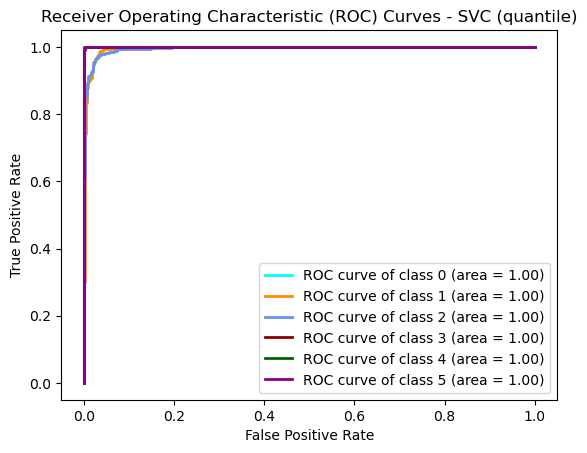

Classification Report for Logistic Regression (median):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.93      0.94      0.93       262
           2       0.94      0.93      0.94       276
           3       0.98      0.99      0.99       247
           4       0.99      0.99      0.99       206
           5       0.98      0.97      0.98       200

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471



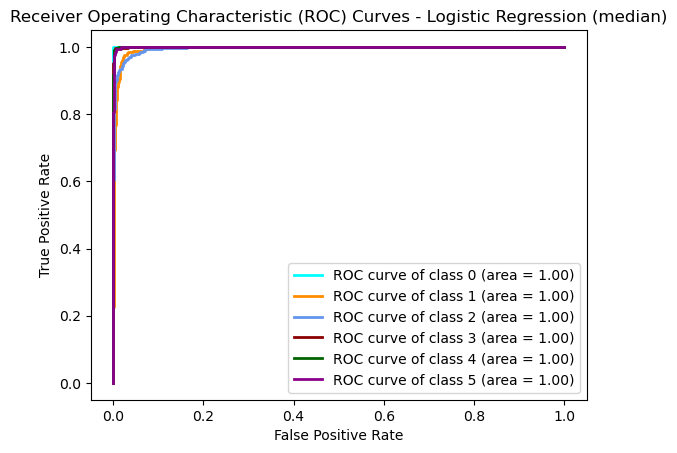

Classification Report for Logistic Regression (quantile):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.94      0.92      0.93       262
           2       0.93      0.95      0.94       276
           3       0.98      0.99      0.99       247
           4       1.00      0.99      0.99       206
           5       0.98      0.98      0.98       200

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471



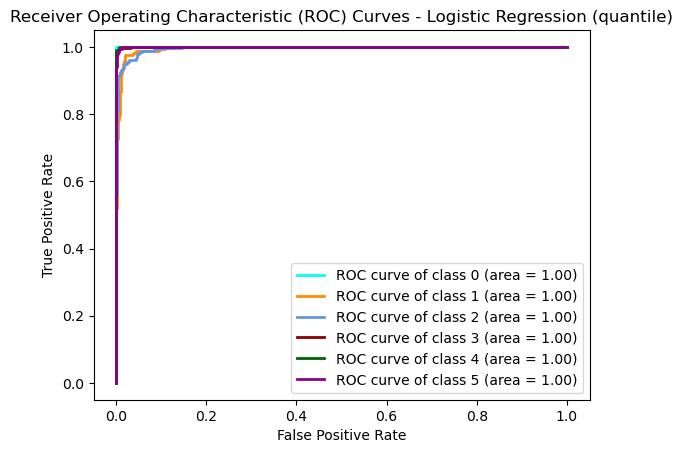

Classification Report for SVC (median):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.94      0.89      0.91       262
           2       0.90      0.94      0.92       276
           3       0.99      1.00      0.99       247
           4       1.00      1.00      1.00       206
           5       0.99      0.99      0.99       200

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471



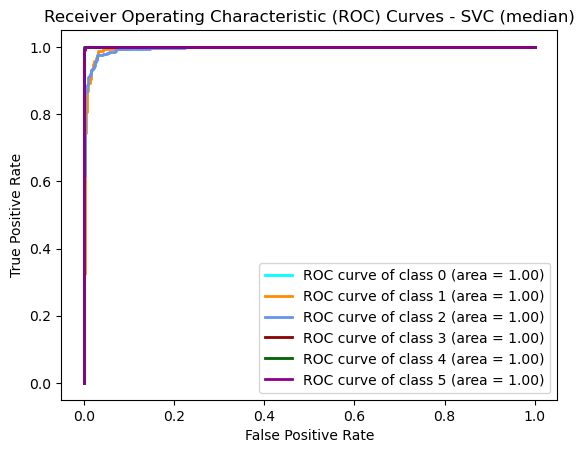

Classification Report for XGBoost (quantile):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       280
           1       0.92      0.87      0.90       262
           2       0.89      0.93      0.91       276
           3       0.98      0.98      0.98       247
           4       0.98      0.99      0.98       206
           5       0.97      0.96      0.97       200

    accuracy                           0.95      1471
   macro avg       0.96      0.95      0.95      1471
weighted avg       0.95      0.95      0.95      1471



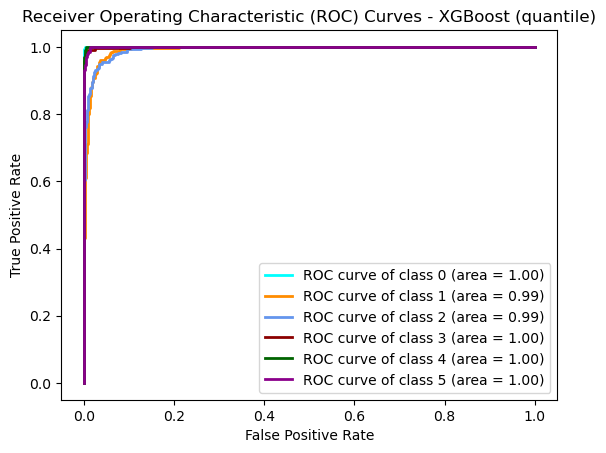

In [20]:
# plot roc_curves and display classification report
classification_reports = {}
roc_curves = {}

plt.figure()

# to fit in pipeline
for model_name, model in new_classifiers:
    pipeline = pipelines[model_name]
    pipeline.set_params(classifier=model)
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[model_name] = report
    
    # Print classification report
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # because the label(Activity) is between 0~5
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
    
    # check the label amount, output will be 6 (0~5)
    n_classes = y_test_bin.shape[1]
    
    # stored into dictionary
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure()
    
    # give six different colors
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkred', 'darkgreen', 'darkmagenta'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves - {model_name}')
    plt.legend(loc='best')
    plt.show()
    
    roc_curves[model_name] = (fpr, tpr, roc_auc)

In [22]:
# Train and Save models
for model_name, model in new_classifiers:
    pipeline = pipelines[model_name]
    pipeline.set_params(classifier=model)
    
    pipeline.fit(X_train, y_train)
    
    # save models
    model_path = f'{model_name}.joblib'
    joblib.dump(pipeline, model_path)
    print(f'Model {model_name} saved to {model_path}')

Model SVC (quantile) saved to SVC (quantile).joblib
Model Logistic Regression (median) saved to Logistic Regression (median).joblib
Model Logistic Regression (quantile) saved to Logistic Regression (quantile).joblib
Model SVC (median) saved to SVC (median).joblib
Model XGBoost (quantile) saved to XGBoost (quantile).joblib


In [23]:
# load models
loaded_models = {}
for model_name, _ in new_classifiers:
    model_path = f'{model_name}.joblib'
    loaded_models[model_name] = joblib.load(model_path)
    print(f'Model {model_name} loaded from {model_path}')

Model SVC (quantile) loaded from SVC (quantile).joblib
Model Logistic Regression (median) loaded from Logistic Regression (median).joblib
Model Logistic Regression (quantile) loaded from Logistic Regression (quantile).joblib
Model SVC (median) loaded from SVC (median).joblib
Model XGBoost (quantile) loaded from XGBoost (quantile).joblib


In [30]:
X_new = X_test  
y_new = y_test  

# choose the model we want to test
model_name = 'SVC (quantile)'
model = loaded_models[model_name]

# predict on new data
y_pred = model.predict(X_new)

# build the dataframe of result
results_df = pd.DataFrame({
    'Actual': y_new,
    'Predicted': y_pred})

# Add new column to see if the actual and prediction are match
results_df['Match'] = results_df['Actual'] == results_df['Predicted']

# random choose 20 data 
sampled_results = results_df.sample(20)
print(f"Results for {model_name}:\n")
display(sampled_results)

# display difference output if they aren't match
print("\nDifferences (where Actual != Predicted):")
print(sampled_results[sampled_results['Match'] == False])

Results for SVC (quantile):



,Actual,Predicted,Match
5493,2,2,True
756,0,0,True
5559,0,0,True
1832,0,0,True
6175,3,3,True
1498,2,2,True
6140,0,0,True
2812,3,3,True
323,5,5,True
5896,2,2,True



Differences (where Actual != Predicted):
Empty DataFrame
Columns: [Actual, Predicted, Match]
Index: []


In [31]:
X_new = X_test  
y_new = y_test  

# choose the model we want to test
model_name = 'Logistic Regression (median)'
model = loaded_models[model_name]

# predict on new data
y_pred = model.predict(X_new)

# build the dataframe of result
results_df = pd.DataFrame({
    'Actual': y_new,
    'Predicted': y_pred})

# Add new column to see if the actual and prediction are match
results_df['Match'] = results_df['Actual'] == results_df['Predicted']

# random choose 20 data 
sampled_results = results_df.sample(20)
print(f"Results for {model_name}:\n")
display(sampled_results)

# display difference output if they aren't match
print("\nDifferences (where Actual != Predicted):")
print(sampled_results[sampled_results['Match'] == False])

Results for Logistic Regression (median):



,Actual,Predicted,Match
5398,3,3,True
5492,2,2,True
538,2,2,True
6579,3,3,True
6970,2,2,True
3366,3,3,True
4984,3,3,True
2533,5,5,True
1385,0,0,True
534,2,2,True



Differences (where Actual != Predicted):
Empty DataFrame
Columns: [Actual, Predicted, Match]
Index: []


In [32]:
X_new = X_test  
y_new = y_test  

# choose the model we want to test
model_name = 'Logistic Regression (quantile)'
model = loaded_models[model_name]

# predict on new data
y_pred = model.predict(X_new)

# build the dataframe of result
results_df = pd.DataFrame({
    'Actual': y_new,
    'Predicted': y_pred})

# Add new column to see if the actual and prediction are match
results_df['Match'] = results_df['Actual'] == results_df['Predicted']

# random choose 20 data 
sampled_results = results_df.sample(20)
print(f"Results for {model_name}:\n")
display(sampled_results)

# display difference output if they aren't match
print("\nDifferences (where Actual != Predicted):")
print(sampled_results[sampled_results['Match'] == False])

Results for Logistic Regression (quantile):



,Actual,Predicted,Match
6760,4,4,True
2548,2,2,True
2221,2,2,True
8,2,2,True
932,3,3,True
6192,3,3,True
1737,5,5,True
7165,5,5,True
4657,4,4,True
6563,3,3,True



Differences (where Actual != Predicted):
Empty DataFrame
Columns: [Actual, Predicted, Match]
Index: []


In [33]:
X_new = X_test  
y_new = y_test  

# choose the model we want to test
model_name = 'SVC (median)'
model = loaded_models[model_name]

# predict on new data
y_pred = model.predict(X_new)

# build the dataframe of result
results_df = pd.DataFrame({
    'Actual': y_new,
    'Predicted': y_pred})

# Add new column to see if the actual and prediction are match
results_df['Match'] = results_df['Actual'] == results_df['Predicted']

# random choose 20 data 
sampled_results = results_df.sample(20)
print(f"Results for {model_name}:\n")
display(sampled_results)

# display difference output if they aren't match
print("\nDifferences (where Actual != Predicted):")
print(sampled_results[sampled_results['Match'] == False])

Results for SVC (median):



,Actual,Predicted,Match
6554,3,3,True
7077,3,3,True
5985,3,3,True
7110,4,4,True
6956,5,5,True
5523,1,1,True
752,0,0,True
4824,3,3,True
1315,2,2,True
1393,0,0,True



Differences (where Actual != Predicted):
Empty DataFrame
Columns: [Actual, Predicted, Match]
Index: []


In [38]:
X_new = X_test  
y_new = y_test  

# choose the model we want to test
model_name = 'XGBoost (quantile)'
model = loaded_models[model_name]

# predict on new data
y_pred = model.predict(X_new)

# build the dataframe of result
results_df = pd.DataFrame({
    'Actual': y_new,
    'Predicted': y_pred})

# Add new column to see if the actual and prediction are match
results_df['Match'] = results_df['Actual'] == results_df['Predicted']

# random choose 20 data 
sampled_results = results_df.sample(20)
print(f"Results for {model_name}:\n")
display(sampled_results)

# display difference output if they aren't match
print("\nDifferences (where Actual != Predicted):")
print(sampled_results[sampled_results['Match'] == False])

Results for XGBoost (quantile):



,Actual,Predicted,Match
1373,0,0,True
2683,5,5,True
5744,0,0,True
2399,2,2,True
6352,0,0,True
4739,1,1,True
1805,1,1,True
800,4,4,True
6884,0,0,True
828,5,5,True



Differences (where Actual != Predicted):
      Actual  Predicted  Match
6329       0          2  False
5928       1          2  False
4696       2          1  False
